<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,65.861245,43.716816,-0.004971,119.573090,119.578686,-0.005596
1,0.0,1.0,27.724328,91.926411,0.006851,129.657589,129.638301,0.019288
2,0.0,2.0,52.372838,48.519542,0.001654,110.894034,110.888857,0.005178
3,0.0,3.0,31.007551,93.776336,-0.000429,134.783458,134.772343,0.011116
4,0.0,4.0,86.152149,33.377931,-0.010384,129.519695,129.537064,-0.017368
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,85.975993,83.209783,0.004846,179.190622,179.181972,0.008650
59996,999.0,56.0,68.827353,32.837666,0.056620,111.721639,111.665231,0.056408
59997,999.0,57.0,93.798821,21.667358,-0.039576,125.426602,125.456367,-0.029765
59998,999.0,58.0,85.870362,82.146743,-0.008399,178.008706,178.013288,-0.004582


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    65.861245  43.716816 -0.004971  119.573090  119.578686 -0.005596
      1.0    27.724328  91.926411  0.006851  129.657589  129.638301  0.019288
      2.0    52.372838  48.519542  0.001654  110.894034  110.888857  0.005178
      3.0    31.007551  93.776336 -0.000429  134.783458  134.772343  0.011116
      4.0    86.152149  33.377931 -0.010384  129.519695  129.537064 -0.017368
...                ...        ...       ...         ...         ...       ...
999.0 55.0   85.975993  83.209783  0.004846  179.190622  179.181972  0.008650
      56.0   68.827353  32.837666  0.056620  111.721639  111.665231  0.056408
      57.0   93.798821  21.667358 -0.039576  125.426602  125.456367 -0.029765
      58.0   85.870362  82.146743 -0.008399  178.008706  178.013288 -0.004582
      59.0   41.107136  28.420119 -0.028494   79.498760   79.537762 -0.039002

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    65.861245  43.716816 -0.004971  119.573090  119.578686 -0.005596
      1.0    27.724328  91.926411  0.006851  129.657589  129.638301  0.019288
      2.0    52.372838  48.519542  0.001654  110.894034  110.888857  0.005178
      3.0    31.007551  93.776336 -0.000429  134.783458  134.772343  0.011116
      4.0    86.152149  33.377931 -0.010384  129.519695  129.537064 -0.017368
...                ...        ...       ...         ...         ...       ...
999.0 55.0   85.975993  83.209783  0.004846  179.190622  179.181972  0.008650
      56.0   68.827353  32.837666  0.056620  111.721639  111.665231  0.056408
      57.0   93.798821  21.667358 -0.039576  125.426602  125.456367 -0.029765
      58.0   85.870362  82.146743 -0.008399  178.008706  178.013288 -0.004582
      59.0   41.107136  28.420119 -0.028494   79.498760   79.537762 -0.039002

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,65.861245,43.716816,-0.004971,119.573090,119.578686,-0.005596
1,0.0,1.0,27.724328,91.926411,0.006851,129.657589,129.638301,0.019288
2,0.0,2.0,52.372838,48.519542,0.001654,110.894034,110.888857,0.005178
3,0.0,3.0,31.007551,93.776336,-0.000429,134.783458,134.772343,0.011116
4,0.0,4.0,86.152149,33.377931,-0.010384,129.519695,129.537064,-0.017368
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,85.975993,83.209783,0.004846,179.190622,179.181972,0.008650
59996,999.0,56.0,68.827353,32.837666,0.056620,111.721639,111.665231,0.056408
59997,999.0,57.0,93.798821,21.667358,-0.039576,125.426602,125.456367,-0.029765
59998,999.0,58.0,85.870362,82.146743,-0.008399,178.008706,178.013288,-0.004582


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    65.861245  43.716816 -0.004971  119.573090  119.578686 -0.005596
      1.0    27.724328  91.926411  0.006851  129.657589  129.638301  0.019288
      2.0    52.372838  48.519542  0.001654  110.894034  110.888857  0.005178
      3.0    31.007551  93.776336 -0.000429  134.783458  134.772343  0.011116
      4.0    86.152149  33.377931 -0.010384  129.519695  129.537064 -0.017368
...                ...        ...       ...         ...         ...       ...
999.0 55.0   85.975993  83.209783  0.004846  179.190622  179.181972  0.008650
      56.0   68.827353  32.837666  0.056620  111.721639  111.665231  0.056408
      57.0   93.798821  21.667358 -0.039576  125.426602  125.456367 -0.029765
      58.0   85.870362  82.146743 -0.008399  178.008706  178.013288 -0.004582
      59.0   41.107136  28.420119 -0.028494   79.498760   79.537762 -0.039002

[60000 rows x 6 columns]

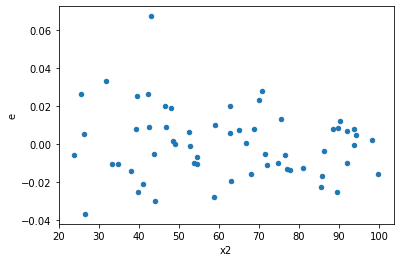

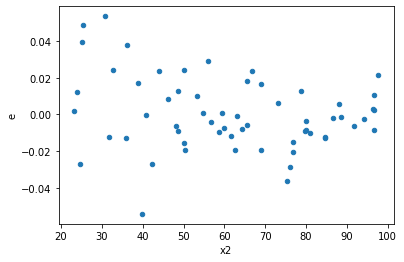

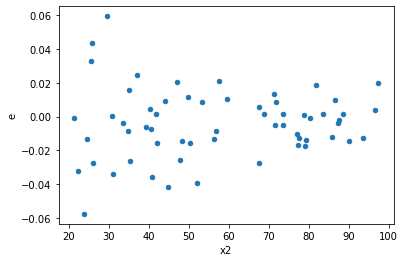

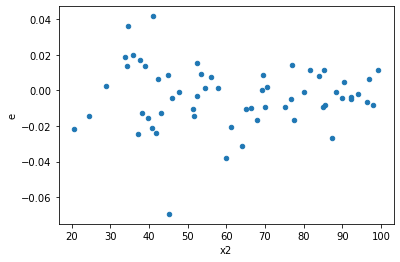

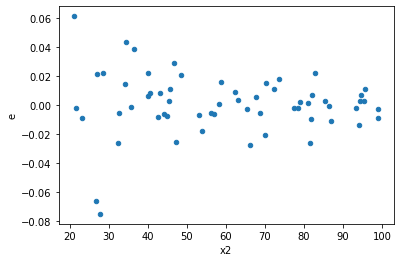

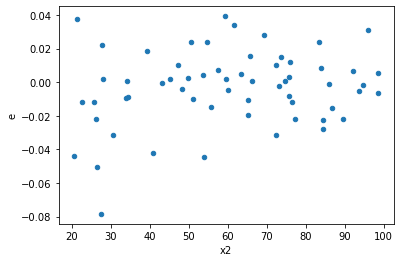

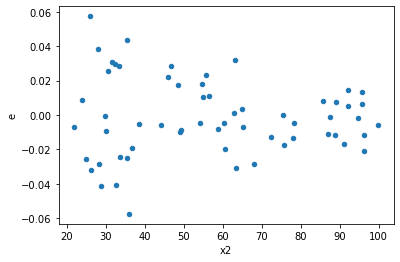

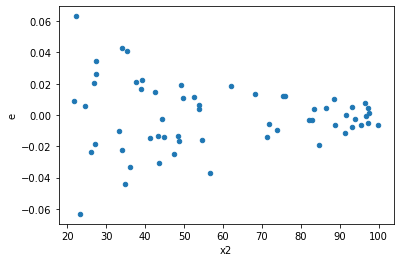

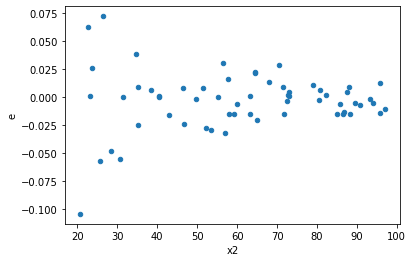

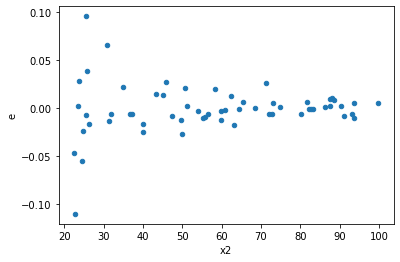

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,22.0,34.0,0.0028565315630058657,0.013169205346901327,0.0001298423437729939,0.0003873295690265096,2.9830759193910272,0.004126264252673595,0.9979368678736632,0.0020631321263367974,Reject001=0 : Heteroscedasticity
1.0,34.0,22.0,0.009311950572349782,0.011155722367496816,0.00027388089918675826,0.0005070782894316734,1.8514554718396,0.13228041941378055,0.9338597902931097,0.06614020970689027,Reject001=1 : Homoscedasticity
3.0,26.0,30.0,0.0054997699177541425,0.011681709595629837,0.00021152961222131318,0.0003893903198543279,1.8408312470545622,0.1086194364977251,0.9456902817511375,0.05430971824886255,Reject001=1 : Homoscedasticity
5.0,28.0,28.0,0.012626370328499323,0.014734786116991087,0.0004509417974464044,0.0005262423613211102,1.1669851060627296,0.6856712627683732,0.6571643686158134,0.3428356313841866,Reject001=1 : Homoscedasticity
8.0,32.0,24.0,0.007045311811317069,0.03279395659453385,0.00022016599410365842,0.001366414858105577,6.206293863266834,1.7946735974438965e-05,0.9999910266320128,8.973367987219483e-06,Reject001=0 : Heteroscedasticity
10.0,27.0,29.0,0.008016749843338201,0.015268220293922804,0.00029691666086437786,0.0005264903549628553,1.773192361217276,0.13347304592806575,0.9332634770359671,0.06673652296403287,Reject001=1 : Homoscedasticity
13.0,25.0,31.0,0.008126652212964894,0.011878569322292214,0.00032506608851859577,0.00038317965555781337,1.1787746218132291,0.6574345024147092,0.6712827487926454,0.3287172512073546,Reject001=1 : Homoscedasticity
15.0,33.0,23.0,0.016331067120815775,0.017847538861315126,0.0004948808218429023,0.000775979950491962,1.5680137848184657,0.2636797128587154,0.8681601435706423,0.1318398564293577,Reject001=1 : Homoscedasticity
16.0,26.0,30.0,0.004923360903590304,0.018622760091866215,0.00018936003475347323,0.0006207586697288738,3.2781926267442656,0.0021340842183139586,0.998932957890843,0.0010670421091569793,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,34.0,0.0028565315630058657,0.013169205346901327,0.0001298423437729939,0.0003873295690265096,2.9830759193910272,0.004126264252673595,Reject001=0 : Heteroscedasticity
1.0,34.0,22.0,0.009311950572349782,0.011155722367496816,0.00027388089918675826,0.0005070782894316734,1.8514554718396,0.13228041941378055,Reject001=1 : Homoscedasticity
2.0,32.0,24.0,0.021076022646793823,0.0028587690426198,0.000658625707712307,0.000119115376775825,0.18085442973303367,1.1778620127241656e-05,Reject001=0 : Heteroscedasticity
3.0,26.0,30.0,0.0054997699177541425,0.011681709595629837,0.00021152961222131318,0.0003893903198543279,1.8408312470545622,0.1086194364977251,Reject001=1 : Homoscedasticity
4.0,30.0,26.0,0.016581733476824574,0.008118294919171406,0.0005527244492274858,0.0003122421122758233,0.5649146020448849,0.13288361100666646,Reject001=1 : Homoscedasticity
5.0,28.0,28.0,0.012626370328499323,0.014734786116991087,0.0004509417974464044,0.0005262423613211102,1.1669851060627296,0.6856712627683732,Reject001=1 : Homoscedasticity
6.0,34.0,22.0,0.025472419863948905,0.003355564895565513,0.000749188819527909,0.00015252567707115967,0.20358776465360445,3.65576156867739e-05,Reject001=0 : Heteroscedasticity
7.0,32.0,24.0,0.023922357667654614,0.0019509081600945688,0.0007475736771142067,8.128784000394037e-05,0.10873555676509199,2.8300934326503403e-08,Reject001=0 : Heteroscedasticity
8.0,32.0,24.0,0.007045311811317069,0.03279395659453385,0.00022016599410365842,0.001366414858105577,6.206293863266834,1.7946735974438965e-05,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    541
Reject001=1 : Homoscedasticity      459
Name: Result_test, dtype: int64